In [1]:
import pandas as pd
import numpy as np

In [2]:
file_path = 'D:/DATA FOR RESEARCH PROJECT/Clean data/pacemakerClean2.csv'
pacemakersClean2 = pd.read_csv(file_path)
# Filter for reports from user facilities, health professionals, and consumers
filtered_df = pacemakersClean2[pacemakersClean2['REPORT_SOURCE_CODE'].isin(['U', 'H', 'C'])]
print(f"Filtered data shape: {filtered_df.shape}")

output_path = 'D:/DATA FOR RESEARCH PROJECT/Clean data/UHC_pacemakerReports.csv'
# Save the filtered DataFrame to a CSV file
filtered_df.to_csv(output_path, index=False)

C:\Users\samridhi\AppData\Local\Temp\ipykernel_20948\1633868284.py:2: DtypeWarning: Columns (8,10,21,22,23,32,33,41,53,54,59,61) have mixed types. Specify dtype option on import or set low_memory=False.
  pacemakersClean2 = pd.read_csv(file_path)


Filtered data shape: (212, 77)


In [3]:
# filtering out records where HEALTH_PROFESSIONAL value is Y
# Filter rows where HEALTH_PROFESSIONAL is 'Y'
hp_df = pacemakersClean2[pacemakersClean2['HEALTH_PROFESSIONAL'] == 'Y']
print(f"Filtered rows: {hp_df.shape}")

Filtered rows: (194831, 77)


In [4]:
# saving the filtered dataframe to a csv
output_path = 'D:/DATA FOR RESEARCH PROJECT/Clean data/HealthProf_pacemakers.csv'
hp_df.to_csv(output_path, index=False)

In [5]:
# Drop rows with missing values in ADVERSE_EVENT_FLAG
hp_df = hp_df.dropna(subset=['ADVERSE_EVENT_FLAG'])

# Convert to integer safely
hp_df['ADVERSE_EVENT_FLAG'] = hp_df['ADVERSE_EVENT_FLAG'].astype(int)

In [6]:
# Convert DATE_RECEIVED to datetime format (if not already)
hp_df['DATE_RECEIVED_x'] = pd.to_datetime(hp_df['DATE_RECEIVED_x'], errors='coerce')

# Extract year
hp_df['YEAR'] = hp_df['DATE_RECEIVED_x'].dt.year

# Ensure ADVERSE_EVENT_FLAG is integer (1 = failure, 0 = no failure)
hp_df['ADVERSE_EVENT_FLAG'] = hp_df['ADVERSE_EVENT_FLAG'].astype(int)

# Group by year and calculate:
# 1. Total reports
# 2. Number of failures
# 3. Failure rate (%)
yearwise_trend = hp_df.groupby('YEAR').agg(
    total_reports=('ADVERSE_EVENT_FLAG', 'count'),
    total_failures=('ADVERSE_EVENT_FLAG', 'sum')
).reset_index()

yearwise_trend['failure_rate_percent'] = (
    yearwise_trend['total_failures'] / yearwise_trend['total_reports']
) * 100

# Display trend
print(yearwise_trend)

   YEAR  total_reports  total_failures  failure_rate_percent
0  2019          38235           22868             59.809075
1  2020          29092           16549             56.885054
2  2021          30992           17352             55.988642
3  2022          47843           29089             60.800953
4  2023          48449           23282             48.054655


In [7]:
# Group by device type and year
device_year_trend = hp_df.groupby(['GENERIC_NAME', 'YEAR']).agg(
    total_reports=('ADVERSE_EVENT_FLAG', 'count'),
    total_failures=('ADVERSE_EVENT_FLAG', 'sum')
).reset_index()

device_year_trend['failure_rate_percent'] = (
    device_year_trend['total_failures'] / device_year_trend['total_reports']
) * 100

print(device_year_trend.head())

                             GENERIC_NAME  YEAR  total_reports  \
0  'IMPLANTABLE PACEMAKER PULSE GENERATOR  2019              1   
1                             , PACEMAKER  2021              1   
2                        ABBOTT PACEMAKER  2022              1   
3                ADAPTOR, LEAD, PACEMAKER  2019             16   
4                ADAPTOR, LEAD, PACEMAKER  2020              3   

   total_failures  failure_rate_percent  
0               1                100.00  
1               1                100.00  
2               0                  0.00  
3              15                 93.75  
4               3                100.00  


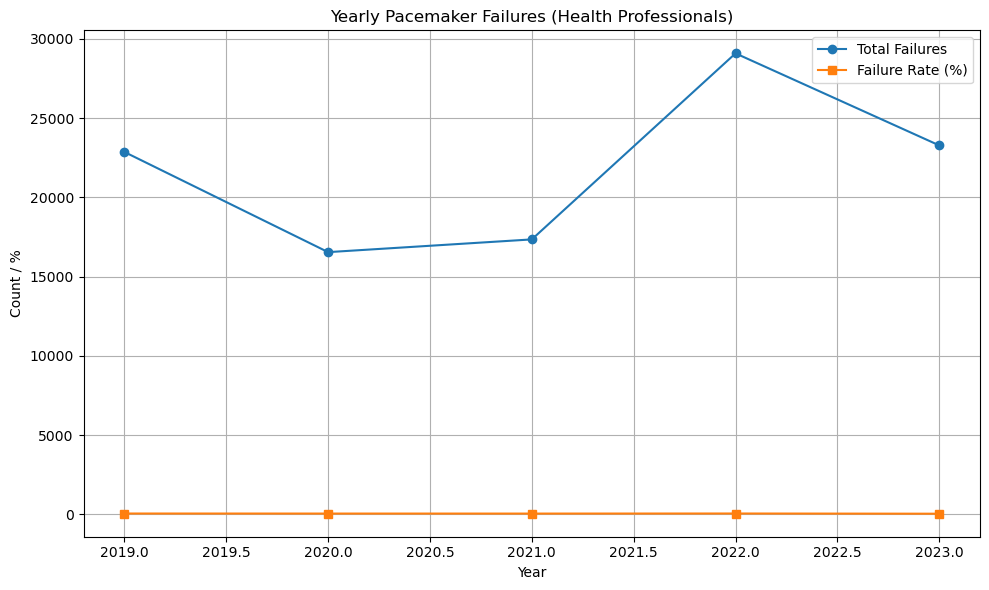

In [8]:
import matplotlib.pyplot as plt

# Line plot for yearly failures
plt.figure(figsize=(10, 6))
plt.plot(yearwise_trend['YEAR'], yearwise_trend['total_failures'], marker='o', label='Total Failures')
plt.plot(yearwise_trend['YEAR'], yearwise_trend['failure_rate_percent'], marker='s', label='Failure Rate (%)')
plt.title('Yearly Pacemaker Failures (Health Professionals)')
plt.xlabel('Year')
plt.ylabel('Count / %')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

                       adverse_event  record_count
0                    battery_problem          8772
1                          infection          7664
2                 discomfort_or_pain          1535
3                         lead_issue          1209
4   device_migration_or_displacement            89
5                 electrical_failure         15273
6                              death           663
7                           hematoma           178
8                  allergic_reaction            77
9                   thrombus_or_clot           154
10         device_explant_or_removal         25913
11                mechanical_failure            11
12      programming_or_setting_error             1
13                    pocket_erosion           770
14               signal_interference           333
15         device_recall_or_advisory           459


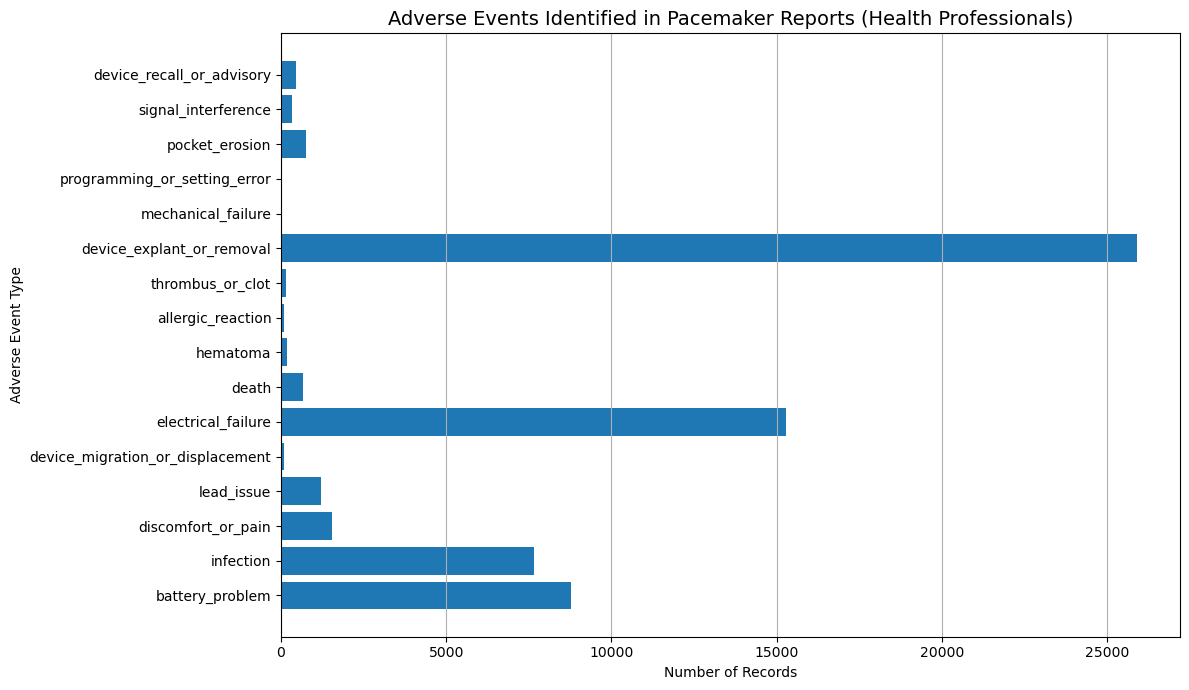

Event summary exported to: D:/DATA FOR RESEARCH PROJECT/Clean data/adverse_event_summary.csv
Flagged records for battery_problem exported to: D:/DATA FOR RESEARCH PROJECT/Clean data/flagged_battery_problem.csv
Flagged records for infection exported to: D:/DATA FOR RESEARCH PROJECT/Clean data/flagged_infection.csv
Flagged records for discomfort_or_pain exported to: D:/DATA FOR RESEARCH PROJECT/Clean data/flagged_discomfort_or_pain.csv
Flagged records for lead_issue exported to: D:/DATA FOR RESEARCH PROJECT/Clean data/flagged_lead_issue.csv
Flagged records for device_migration_or_displacement exported to: D:/DATA FOR RESEARCH PROJECT/Clean data/flagged_device_migration_or_displacement.csv
Flagged records for electrical_failure exported to: D:/DATA FOR RESEARCH PROJECT/Clean data/flagged_electrical_failure.csv
Flagged records for death exported to: D:/DATA FOR RESEARCH PROJECT/Clean data/flagged_death.csv
Flagged records for hematoma exported to: D:/DATA FOR RESEARCH PROJECT/Clean data/fl

In [9]:
adverse_event_keywords = {
    'battery_problem': [
        'battery', 'battery depletion', 'power', 'charge', 'battery low', 'battery failure', 'premature battery depletion', 'battery issue'
    ],
    'infection': [
        'infection', 'infected', 'sepsis', 'bacterial infection', 'systemic infection', 'local infection', 'pocket infection'
    ],
    'discomfort_or_pain': [
        'pain', 'discomfort', 'irritation', 'burning', 'redness', 'swelling', 'tenderness'
    ],
    'lead_issue': [
        'lead fracture', 'lead dislodgement', 'lead migration', 'lead break', 'lead perforation', 'lead insulation failure'
    ],
    'device_migration_or_displacement': [
        'migration', 'device movement', 'device shifted', 'displacement', 'device dislodgement', 'device moved'
    ],
    'electrical_failure': [
        'failure to pace', 'loss of capture', 'output failure', 'electrical malfunction', 'oversensing', 'undersensing'
    ],
    'death': [
        'death', 'fatal', 'deceased', 'died'
    ],
    'hematoma': [
        'hematoma', 'bruising', 'blood pooling', 'internal bleeding'
    ],
    'allergic_reaction': [
        'allergic reaction', 'rash', 'hypersensitivity', 'anaphylaxis', 'skin reaction'
    ],
    'thrombus_or_clot': [
        'thrombus', 'clot', 'embolism', 'thrombosis', 'vascular occlusion'
    ],
    'device_explant_or_removal': [
        'device explant', 'device removal', 'explant', 'extraction', 'removed device'
    ],
    'mechanical_failure': [
        'mechanical failure', 'component failure', 'connector failure', 'header fracture'
    ],
    'programming_or_setting_error': [
        'programming error', 'incorrect settings', 'parameter error', 'programming malfunction'
    ],
    'pocket_erosion': [
        'pocket erosion', 'skin erosion', 'erosion'
    ],
    'signal_interference': [
        'signal interference', 'electromagnetic interference', 'emf interference', 'noise detected'
    ],
    'device_recall_or_advisory': [
        'recall', 'device advisory', 'field correction', 'urgent correction'
    ]
}

# Let's say you have FOI_TEXT (not FOI_TEXT_CLEAN)
hp_df['FOI_TEXT'] = hp_df['FOI_TEXT'].astype(str)

for event, keywords in adverse_event_keywords.items():
    hp_df[event] = hp_df['FOI_TEXT'].apply(
        lambda x: int(any(keyword.lower() in x.lower() for keyword in keywords))
    )


# Count records for each event
event_summary = hp_df[list(adverse_event_keywords.keys())].sum().reset_index()
event_summary.columns = ['adverse_event', 'record_count']

# Display the summary
print(event_summary)

# Plot the results
plt.figure(figsize=(12, 7))
plt.barh(event_summary['adverse_event'], event_summary['record_count'])
plt.title('Adverse Events Identified in Pacemaker Reports (Health Professionals)', fontsize=14)
plt.xlabel('Number of Records')
plt.ylabel('Adverse Event Type')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

# Export the summary
summary_output_path = 'D:/DATA FOR RESEARCH PROJECT/Clean data/adverse_event_summary.csv'
event_summary.to_csv(summary_output_path, index=False)
print(f"Event summary exported to: {summary_output_path}")

# Export flagged records for each event separately
for event in adverse_event_keywords.keys():
    event_df = hp_df[hp_df[event] == 1]
    event_output_path = f'D:/DATA FOR RESEARCH PROJECT/Clean data/flagged_{event}.csv'
    event_df.to_csv(event_output_path, index=False)
    print(f"Flagged records for {event} exported to: {event_output_path}")

In [10]:
# First make sure the date is parsed correctly
hp_df['DATE_RECEIVED_x'] = pd.to_datetime(hp_df['DATE_RECEIVED_x'], errors='coerce')

# Extract year
hp_df['YEAR'] = hp_df['DATE_RECEIVED_x'].dt.year

# List of event columns (the ones you flagged)
event_columns = list(adverse_event_keywords.keys())

# Now group year-wise
yearwise_event_counts = hp_df.groupby('YEAR')[event_columns].sum().reset_index()

print(yearwise_event_counts)


   YEAR  battery_problem  infection  discomfort_or_pain  lead_issue  \
0  2019              590        479                  43          68   
1  2020              717        134                  19          17   
2  2021             1622        957                 171         160   
3  2022             3509       3443                 582         619   
4  2023             2334       2651                 720         345   

   device_migration_or_displacement  electrical_failure  death  hematoma  \
0                                 6                 282     64         8   
1                                 3                 194     24         1   
2                                14                1489     80        10   
3                                42                5868    205        68   
4                                24                7440    290        91   

   allergic_reaction  thrombus_or_clot  device_explant_or_removal  \
0                  5                 4         

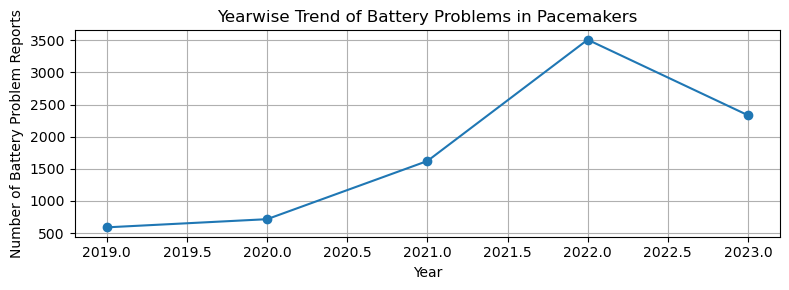

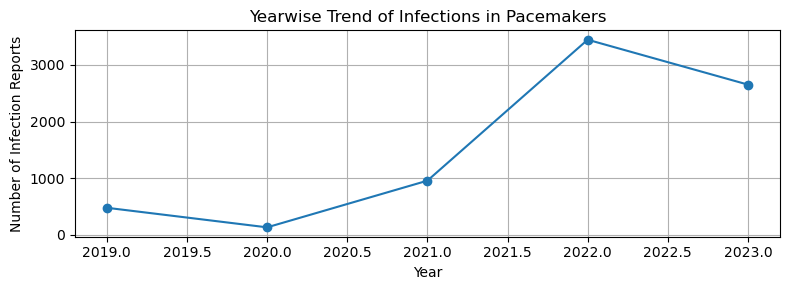

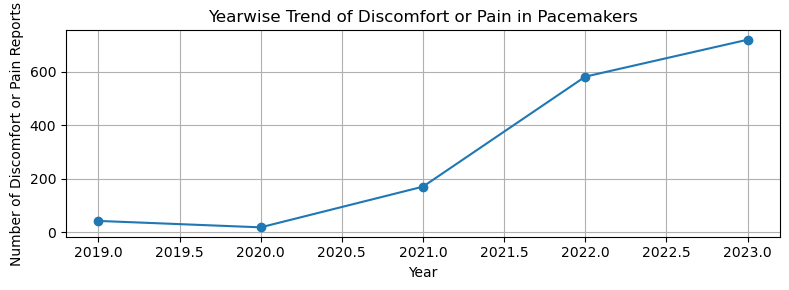

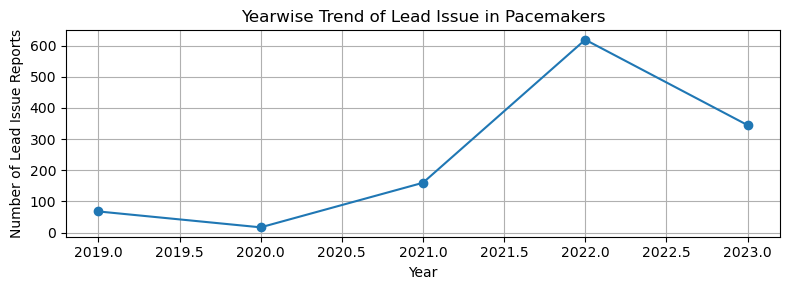

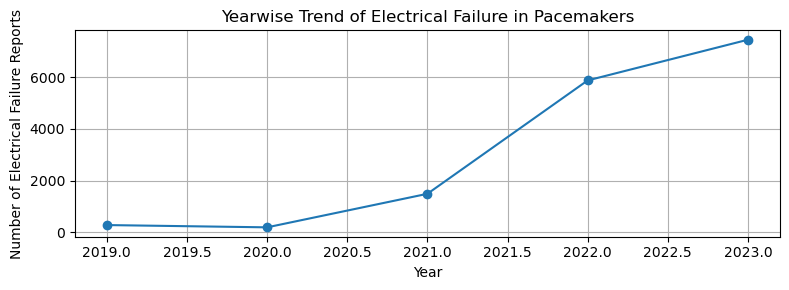

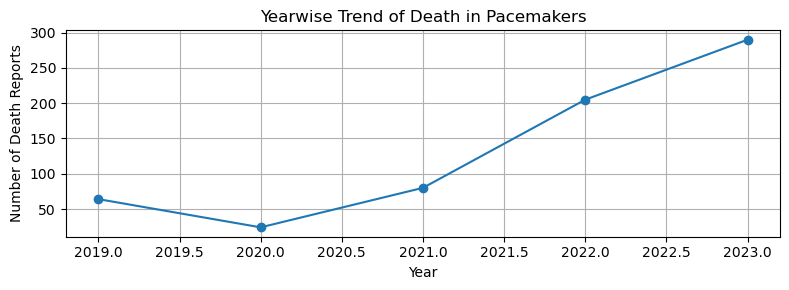

In [31]:
import matplotlib.pyplot as plt

# 1. Battery Problem trend
plt.figure(figsize=(8,3))
plt.plot(yearwise_event_counts['YEAR'], yearwise_event_counts['battery_problem'], marker='o')
plt.title('Yearwise Trend of Battery Problems in Pacemakers')
plt.xlabel('Year')
plt.ylabel('Number of Battery Problem Reports')
plt.grid(True)
plt.tight_layout()
plt.show()


# 2. Infection trend
plt.figure(figsize=(8,3))
plt.plot(yearwise_event_counts['YEAR'], yearwise_event_counts['infection'], marker='o')
plt.title('Yearwise Trend of Infections in Pacemakers')
plt.xlabel('Year')
plt.ylabel('Number of Infection Reports')
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Discomfort or pain trend
plt.figure(figsize=(8,3))
plt.plot(yearwise_event_counts['YEAR'], yearwise_event_counts['discomfort_or_pain'], marker='o')
plt.title('Yearwise Trend of Discomfort or Pain in Pacemakers')
plt.xlabel('Year')
plt.ylabel('Number of Discomfort or Pain Reports')
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Lead issue trend
plt.figure(figsize=(8,3))
plt.plot(yearwise_event_counts['YEAR'], yearwise_event_counts['lead_issue'], marker='o')
plt.title('Yearwise Trend of Lead Issue in Pacemakers')
plt.xlabel('Year')
plt.ylabel('Number of Lead Issue Reports')
plt.grid(True)
plt.tight_layout()
plt.show()

# 5. Electrical failure trend
plt.figure(figsize=(8,3))
plt.plot(yearwise_event_counts['YEAR'], yearwise_event_counts['electrical_failure'], marker='o')
plt.title('Yearwise Trend of Electrical Failure in Pacemakers')
plt.xlabel('Year')
plt.ylabel('Number of Electrical Failure Reports')
plt.grid(True)
plt.tight_layout()
plt.show()

# 6. Death trend
plt.figure(figsize=(8,3))
plt.plot(yearwise_event_counts['YEAR'], yearwise_event_counts['death'], marker='o')
plt.title('Yearwise Trend of Death in Pacemakers')
plt.xlabel('Year')
plt.ylabel('Number of Death Reports')
plt.grid(True)
plt.tight_layout()
plt.show()